<h1 align="center">Actividad 1: Agrupar datos con algoritmos de Clustering en Python</h3>

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<h2> Preámbulo</h2>
<p> Esta activad se inspira de ejercicios disponibles en los recursos siguientes:<p>
<ul>
<li> Guías y código Python de <a href="http://brandonrose.org/">Brandon Rose</li>
<li>Curso de <a href="https://www.datacamp.com/courses/unsupervised-learning-in-python">DataCamp</a> y código disponible en la cuenta GitHub de <a href="https://github.com/benjaminwilson/python-clustering-exercises">Benjamin Wilson</a></li>
</ul>
<p> La actividad requiere el uso de Python 3.x y <a href="http://jupyter.org/install">Jupyter Notebook</a>. El código entregado fue probado con Python 3.6.1. Para saber cuál versión de Python usted está utilizando, ejecutar la celda siguiente (está información es importante cuando se necesitará instalar nuevos paquetes.</p>
</div>

In [6]:
!python -V

Python 3.6.1 :: Anaconda custom (64-bit)


<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<h2>Objetivos de la actividad</h2>
<p>El <b>objetivo general</b> de esta actividad consiste en saber explorar la estructura oculta de un dataset, implementando una metodología de agrupamiento de datos clásico, utilizando unos algoritmos de clustering estándares (K-means, Ward clustering) sobre datos estructurados y no estructurados y describiendo sus principales características.</p>  

<p> Algunos <i>objetivos secundarios</i> consisten en:
<ol>
<li> programar con algunas librerías Python para analizar y visualizar datos (<a href="https://pandas.pydata.org/">Pandas</a>, Sci-Kit, Matplotlib, etc.)</li>
<li> utilizar y describir ciertos conceptos de Tratamiento Automático del Lenguaje (tokenización, stemming, tf-idf) a partir de la librería python <a href="https://www.nltk.org/">NLTK</a></li>
</ol>
</p>
</div>

<h2>1. Ejercicio 1: K-means sobre datos estructurados bi-dimensionales</h2>

<p>El primer dataset que queremos explorar consiste en un archivo CSV donde se encuentra un conjunto 300 instancias descritas por 2 características numéricas. 
<br>Ejemplo:<i>1.70993371252,0.698852527208</i></p>
<ul><li>La primera etapa consiste en cargar los datos en un objeto <i>DataFrame</i>. Un DataFrame es una de las estructuras de datos proveidas por Pandas para representar los datos, consiste en una matriz en dos dimensiones (ver <a href="https://pandas.pydata.org/pandas-docs/stable/dsintro.html">más detalles</a>) donde cada fila es un dato y cada columna una característica sobre los datos.</li></ul>

In [13]:
import pandas as pd
dataframe = pd.read_csv('datasets/dataset1.csv')
#mostrar la dataframe (sacar el '#')
#dataframe

<ul><li>Para tener una primera comprensión de nuestros datos, queremos visualizarlos en un <i><a href="https://en.wikipedia.org/wiki/Scatter_plot">Scatter plot</a></i>, a través la librería Matplotlib:</li></ul>

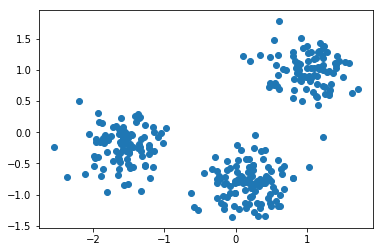

In [14]:
import matplotlib.pyplot as plt

#Crear un arreglo 'coordinates_x' que contiene los valores de la columna 0 de nuestro dataframe
coordinates_x = dataframe.values[:,0]
#lo mismo con los valores de la columna 1 del dataframe
coordinates_y = dataframe.values[:,1]

#Crear y mostrar el scatter plot pasando las coordinadas como parametros de la función plt.scatter().
plt.scatter(coordinates_x, coordinates_y)
plt.show()

<p> Como pueden verlo, nuestro dataset tiene una estructura bastante simple y explicita, aparecen 3 grupos de datos (o <i>clústers</i>). Sin embargo, este caso es particularmente simple ya que los datos tienen solamente 2 dimensiones y que los clústers están bien separados.

El algoritmo K-means (o algoritmo de Lloyd) es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. El problema es computacionalmente difícil (NP-hard). Sin embargo, hay eficientes heurísticas que se emplean comúnmente y convergen rápidamente a un óptimo local (ver <a href="https://en.wikipedia.org/wiki/K-means_clustering">más detalles</a>).
<ul><li>La librería SciKit-learn de Python ofrece una implementación de este algoritmo, que se puede utilizar con la API siguiente:</li></ul>

In [20]:
from sklearn.cluster import KMeans
#Declaración de un modelo de clustering especificando el número a priori de clusters que queremos encontrar. 
##En este caso, hemos elegido por casualidad n_clusters=5.
modelKmeans = KMeans(n_clusters=5)
#Entrenamiento del modelo de clustering con los datos de nuestro dataframe
modelKmeans.fit(dataframe.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<div style="border: 2px solid #000000;">
<b>Preguntas:</b>
<ol>
<li> ¿Cuáles son las 3 etapas clásicas del algoritmo de Lloyd?</li>
<li> ¿Por qué es necesario initializar varias veces el algoritmo? De qué sirve el parametro n_init?</li>
<li> ¿Cómo elegir el número de inicializaciones e iteraciones? (n_init y max_iter)</li>
</ol>
</div>

<ul>
<li>Ahora queremos visualizar cómo el algoritmo agrupó los datos en 5 grupos:
</ul>


[4 2 3 3 2 2 3 4 2 2 3 0 2 1 2 4 1 3 4 1 2 4 2 0 0 2 0 4 0 2 3 3 3 2 4 2 0
 4 2 4 4 3 2 2 2 4 0 3 4 1 3 1 4 4 0 2 0 0 2 1 2 0 0 1 1 2 1 2 2 0 1 2 3 4
 1 2 4 0 0 3 0 2 1 2 2 2 2 4 0 3 2 1 2 4 4 4 3 2 2 1 2 4 2 1 4 1 3 3 2 2 4
 2 3 2 2 2 0 2 1 3 4 4 0 4 4 2 3 0 2 2 1 3 2 0 2 4 1 2 3 0 1 1 4 3 3 0 1 2
 0 4 0 3 1 2 3 2 4 0 3 2 3 1 1 2 0 0 2 3 3 0 0 3 0 0 2 0 3 1 3 0 4 3 0 3 3
 0 2 3 4 4 0 4 2 1 0 2 2 2 4 2 0 4 2 1 1 0 1 0 0 2 2 0 3 2 3 0 3 2 0 2 2 2
 2 3 3 1 0 4 2 0 3 2 0 4 2 4 3 3 3 1 1 2 4 0 1 1 4 2 3 2 2 0 0 2 2 2 4 1 0
 2 0 3 1 3 3 3 4 4 2 4 0 2 3 3 2 4 1 3 2 2 0 4 4 2 2 0 3 2 2 1 4 4 0 2 4 0
 4 2 2 2]


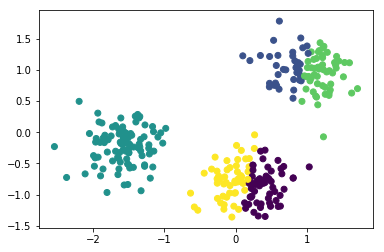

In [23]:
#Crear un arreglo de datos donde cada valor corresponde a la decision del modelo K-Means a la pregunta siguiente:
##¿A qué clúster pertenece el dato corriente de la dataframe?
labels = modelKmeans.predict(dataframe.values)
#print(labels)

#Crear un Scatter Plot donde cada punto tiene un color asociado a un grupo
plt.scatter(dataframe.values[:,0], dataframe.values[:,1], c=labels)
plt.show()

<ul><li>Se puede utilizar el mismo modelo para clasificar nuevos datos. NB: Sin embargo, si el objetivo aplicativo consiste en clasificar datos según ciertas categorías es recomendable seguir una metodología de aprendizaje supervisado.</li></ul>

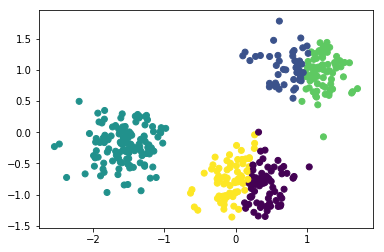

In [38]:
#Cargar un dataset con nuevos datos
dataframe2 = pd.read_csv('datasets/dataset2.csv')

#Utilizar el modelo K-Means anterior para clasificar los nuevos datos
labels2 = modelKmeans.predict(dataframe2.values)

#Visualizar el resultado de la predicción en un Scatter Plot
plt.scatter(dataframe2.values[:,0], dataframe2.values[:,1], c=labels2)
plt.show()

<div style="border: 2px solid #000000;">
<b>Preguntas:</b>
<ol>
<li> ¿Cómo el algoritmo de Lloyd permitió predecir la clase de los nuevos datos?</li>
<li> ¿Cómo se podría definir el concepto de <i>'centroid'</i>?</li>
</ol>
</div>

<ul><li>Visualizemos los <i>centroids</i> de cada clúster:</li></ul>

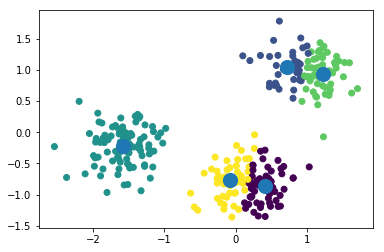

In [31]:
#en el API del modelo k-means existe un metodo permitiendo de obtener un arreglo de datos correspondiendo a los centroids 
centroids = model.cluster_centers_

#Dibujamos el Scatter Plot de la dataframe inicial ...
plt.scatter(dataframe.values[:,0], dataframe.values[:,1], c=labels)
#...y agregamos los centroids en el mismo plot
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200)
plt.show()

<ul><li>La distancia con el centroid permite clasificar los nuevos datos:</li></ul>

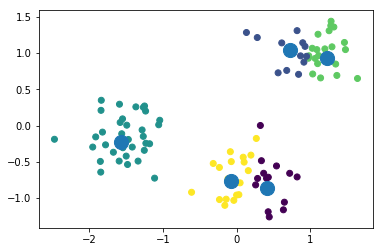

In [40]:
#nuevos datos de la dataframe2
plt.scatter(dataframe2.values[:,0], dataframe2.values[:,1], c=labels2)
#mismos centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200)
plt.show()

<div style="border: 2px solid #000000;">
<b>Pregunta:</b>
<ol>
<li> ¿Existe un número de clúster mejor que los otros para buscar la estructura oculta de los datos?</li>
<li> ¿Cómo determinar cuál es el mejor número de clúster?</li>
</ol>
</div>

<p>Existen varios métodos estadísticos para determinar el mejor número de clústers tales como los métodos <i>Elbow</i>, <i>Average Silhouette</i> y <i>Gap Statistics</i> (REFERENCIA NECESARIA). En la API de la librería SciKit-Learn también existe un método llamado <i>inertia</i> que permite estimar el mejor número k:</p>

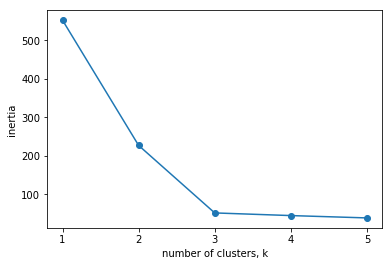

In [41]:
from sklearn.cluster import KMeans

num_k = range(1, 6)
inertias = []

for k in num_k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(dataframe)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

    import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()
